In [ ]:
#考虑一个单隐藏层的神经网络，结构如下：

#输入层：3 个神经元。
#隐藏层：2 个神经元，使用 Tanh 激活函数。
#输出层：1 个神经元，使用线性激活函数（即无激活函数）。

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#计算tanh函数
def tanh(a):
  return np.tanh(a)

In [6]:
#计算前向传播,求出y_pred
def forward(W1, b1, b2, X):
  Z = np.dot(X, W1) + b1 # ndarray (2,)
  H = np.tanh(Z) #ndarray (2,)

  y_pred = np.dot(W2, H) + b2
  return Z, H, y_pred

In [8]:
#求损失函数loss
def compute_loss(y_pred, y_true):
  loss = (y_pred - y_true)**2 / 2
  return loss

In [17]:
#反向传导，求梯度计算
def backward(y_pred, y_true, H, W2, X):
  b2_grad = y_pred - y_true
  W2_grad = b2_grad * H

  bh = b2_grad * W2
  bz = bh * (1- H**2)
  b1_grad = bz
  W1_grad = np.outer(X, bz)

  return W1_grad, W2_grad, b1_grad, b2_grad

In [19]:
#求参数更新函数
def update_params(W1, W2, b1, b2, W1_grad, W2_grad, b1_grad, b2_grad, learning_rate):
  W1 -= learning_rate * W1_grad
  W2 -= learning_rate * W2_grad
  b1 -= learning_rate * b1_grad
  b2 -= learning_rate * b2_grad
  return W1, W2, b1, b2

Epochs: 1 loss: [2.1549 2.2472] W1_grad: [-1.24  0.85  0.62 -0.42 -0.25  0.17] W2_grad: [-0.08 -0.11] b1_grad: [-1.24  0.85] b2_grad: [-2.08 -2.12] W1 [[ 0.21 -0.11]
 [ 0.39  0.3 ]
 [-0.3   0.5 ]] W2 [ 0.6 -0.4] b1 [0.11 0.19] b2 [-0.08 -0.08]
Epochs: 11 loss: [1.4891 1.7062] W1_grad: [-1.    0.74  0.5  -0.37 -0.2   0.15] W2_grad: [-0.5   0.24] b1_grad: [-1.    0.74] b2_grad: [-1.73 -1.85] W1 [[ 0.32 -0.19]
 [ 0.34  0.34]
 [-0.28  0.48]] W2 [ 0.63 -0.41] b1 [0.22 0.11] b2 [0.11 0.12]
Epochs: 21 loss: [1.0221 1.2831] W1_grad: [-0.77  0.65  0.39 -0.32 -0.15  0.13] W2_grad: [-0.66  0.45] b1_grad: [-0.77  0.65] b2_grad: [-1.43 -1.6 ] W1 [[ 0.41 -0.26]
 [ 0.3   0.38]
 [-0.26  0.47]] W2 [ 0.7  -0.45] b1 [0.31 0.04] b2 [0.26 0.29]
Epochs: 31 loss: [0.6965 0.9481] W1_grad: [-0.59  0.57  0.3  -0.28 -0.12  0.11] W2_grad: [-0.68  0.56] b1_grad: [-0.59  0.57] b2_grad: [-1.18 -1.38] W1 [[ 0.48 -0.32]
 [ 0.26  0.41]
 [-0.24  0.46]] W2 [ 0.76 -0.5 ] b1 [ 0.38 -0.02] b2 [0.39 0.44]
Epochs: 41 loss: [0

<ipython-input-30-d28836bf0b10>:40: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


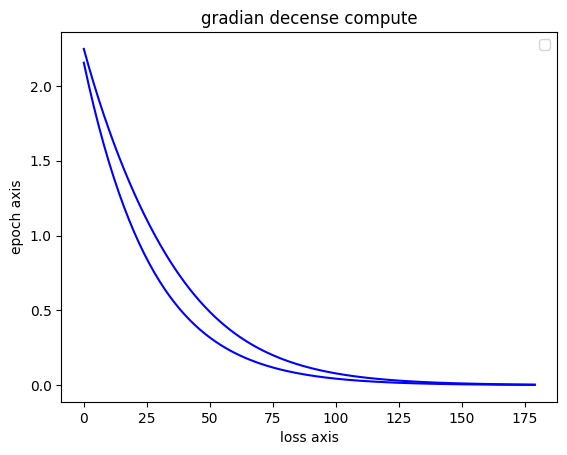

In [30]:
#初始化

X = np.array([1.0, -0.5,  0.2])
W1 = np.array([[0.2, -0.1], [0.4, 0.3], [-0.3, 0.5]])
b1 = np.array([0.1, 0.2])
W2 = np.array([0.6, -0.4])
b2 = -0.1

y_true = 2.0

learning_rate = 0.01
losses = []
epochs = 180

for epoch in range(epochs):
  Z, H, y_pred = forward(W1, b1, b2, X)
  loss = compute_loss(y_pred, y_true)
  losses.append(loss)

  W1_grad, W2_grad, b1_grad, b2_grad = backward(y_pred, y_true, H, W2, X)
  W1, W2, b1, b2 = update_params(W1, W2, b1, b2, W1_grad, W2_grad, b1_grad, b2_grad, learning_rate)

  if epoch%10 ==0:
    print("Epochs:", epoch + 1,
      "loss:", np.round(loss, 4),
      "W1_grad:", np.round(W1_grad.flatten(), 2),
      "W2_grad:", np.round(W2_grad.flatten(), 2),
      "b1_grad:", np.round(b1_grad.flatten(), 2),
      "b2_grad:", np.round(b2_grad.flatten(), 2),
      "W1", np.round(W1, 2),
      "W2", np.round(W2, 2),
      "b1", np.round(b1, 2),
      "b2", np.round(b2, 2)
    )

plt.plot(range(epochs), losses, "blue")
plt.xlabel("loss axis")
plt.ylabel("epoch axis")
plt.title("gradian decense compute")
plt.legend()
plt.show()